In [1]:
from rcwa import Source, Layer, LayerStack, Crystal, Solver, RectangularGrating
from rcwa.shorthand import complexArray
import numpy as np
import matplotlib.pyplot as plt

In [3]:
reflection_layer = Layer(er=1.0, ur=1.0)
transmission_layer = Layer(er=9.0, ur=1.0)

wavelength = 0.5
deg = np.pi / 180
k0 = 2*np.pi/wavelength
theta = 60 * deg
phi = 1*deg
pTEM = 1/np.sqrt(2)*complexArray([1,1j])
source = Source(wavelength=wavelength, theta=theta, phi=phi, pTEM=pTEM, layer=reflection_layer)

crystal_thickness = 0.5

N_harmonics = 11

grating_layer = RectangularGrating(period=2, thickness=0.5, n=4, n_void=1, nx=500)
layer_stack = LayerStack(grating_layer, incident_layer=reflection_layer, transmission_layer=transmission_layer)

solver_1d = Solver(layer_stack, source, N_harmonics)
results = solver_1d.solve()

1/1 |############################################################|Time: 0:00:00


In [42]:
print(f"The grating's lattice vectors: {grating_layer.lattice_vector}")

The grating's lattice vectors: [2 0]


In [9]:
solver_1d.n_harmonics

11

# Plotting the Kx, Ky matrices

Text(0, 0.5, 'm')

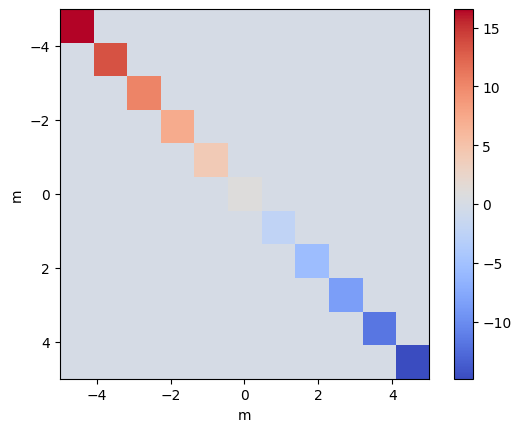

In [34]:
plt.imshow(np.real(solver_1d.Kx), cmap=plt.get_cmap("coolwarm"), extent=(-5, 5, 5, -5))
plt.colorbar()
plt.xlabel("m")
plt.ylabel("m")

In [62]:
kx_normalized = np.diag(solver_1d.Kx)

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, '$k_{x, m}$')

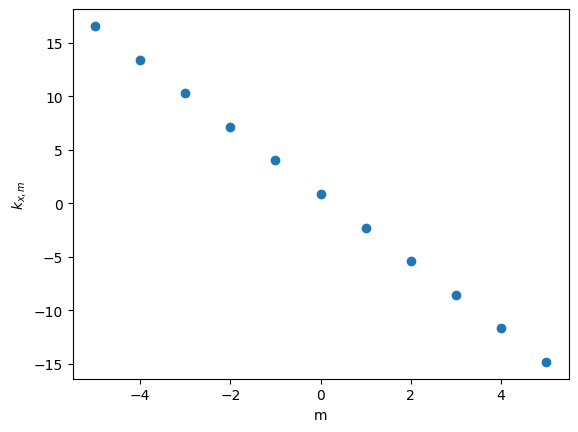

In [63]:
plt.scatter(np.arange(-5, 6), kx_normalized)
plt.xlabel("m")
plt.ylabel(r"$k_{x, m}$")

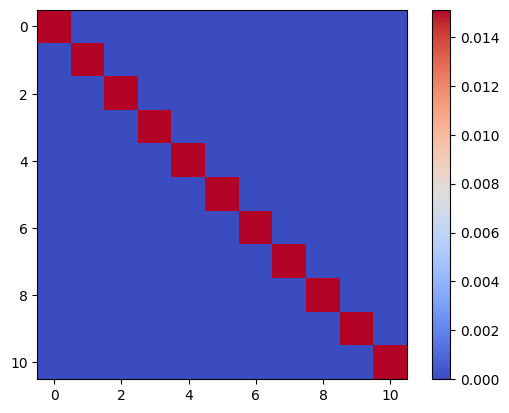

In [10]:
plt.imshow(np.real(solver_1d.Ky), cmap=plt.get_cmap("coolwarm"))
plt.colorbar()

In [66]:
ky_normalized = np.diag(solver_1d.Ky)

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, '$k_{y, n}$')

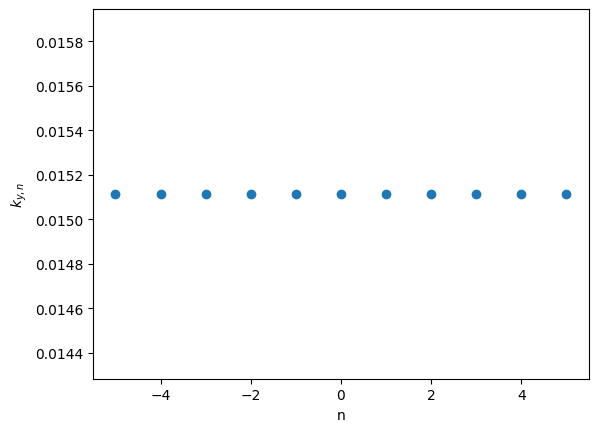

In [67]:
plt.scatter(np.arange(-5, 6), ky_normalized)
plt.xlabel("n")
plt.ylabel(r"$k_{y, n}$")

Since our grating is only defined in 1D in the x direction, it makes sense for there to be only 1 $k_y$ component.

# Visualizing the S-matrix

| Component of the S-matrix | Meaning |
|---|---|
| `S[0, 0]` | Reflection | 
| `S[1, 0]` | Transmission | 


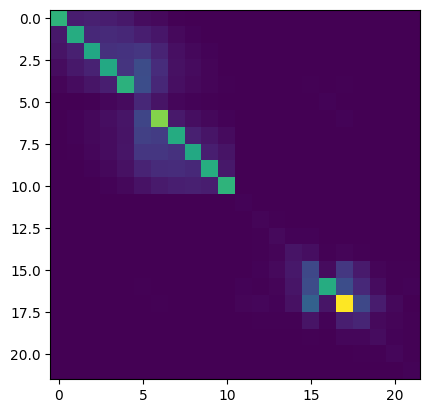

In [43]:
plt.imshow(np.abs(solver_1d.SGlobal[0, 0]))

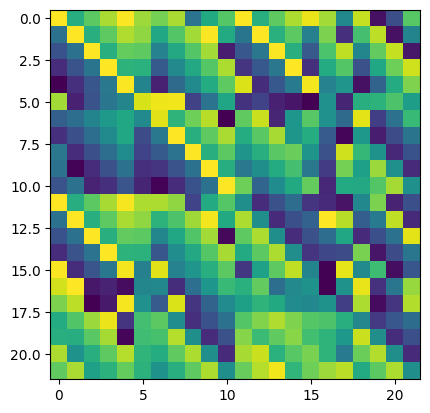

In [14]:
plt.imshow(np.angle(solver_1d.SGlobal[0, 0]))

def s_incident(source, n_harmonics: Union[int, ArrayLike]):
    totalNumberHarmonics = np.prod(n_harmonics)
    return np.hstack((source.pX * kroneckerDeltaVector(totalNumberHarmonics),
            source.pY * kroneckerDeltaVector(totalNumberHarmonics)))


In [17]:
from rcwa.solver import s_incident

In [44]:
incidentFieldHarmonics = s_incident(solver_1d.source, solver_1d.n_harmonics)

In [45]:
incidentFieldHarmonics.shape

(22,)

In [46]:
ReflectionRegionHarmonicsCoefficients = np.linalg.inv(solver_1d.WReflectionRegion) @ incidentFieldHarmonics

In [47]:
ReflectionRegionHarmonicsCoefficients.shape

(22,)

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


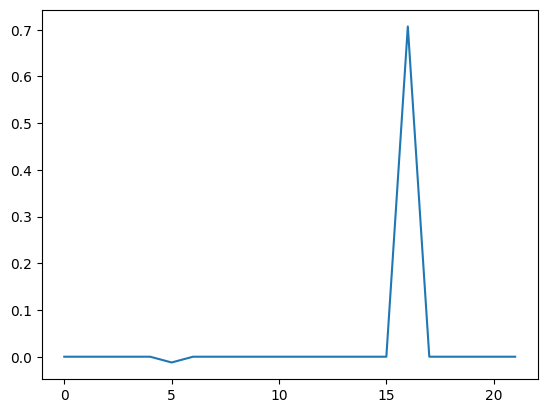

In [48]:
plt.plot(ReflectionRegionHarmonicsCoefficients)

In [53]:
ReflectedHarmonicsCoefficients = solver_1d.SGlobal[0, 0] @ ReflectionRegionHarmonicsCoefficients

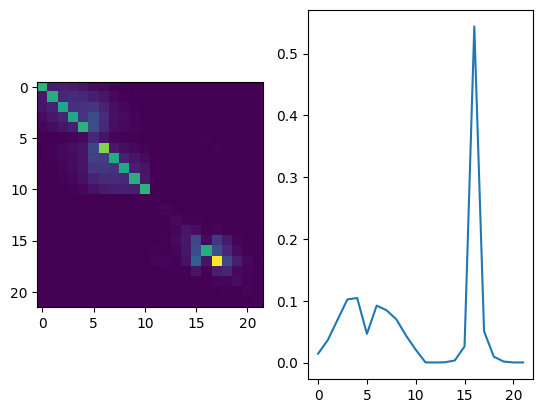

In [54]:
plt.subplot(121)
plt.imshow(np.abs(solver_1d.SGlobal[0, 0]))
plt.subplot(122)
plt.plot(np.abs(ReflectedHarmonicsCoefficients))

# Angular spectrum decomposition of the reflected waves $A(k_x, k_y)$

In [55]:
maxIndex = int(len(ReflectedHarmonicsCoefficients)/2)
maxIndex

11

In [57]:
ReflectedHarmonicsCmplxAmp_X = ReflectedHarmonicsCoefficients[0:maxIndex]
ReflectedHarmonicsCmplxAmp_Y = ReflectedHarmonicsCoefficients[maxIndex:]

Text(0, 0.5, '$E_x$')

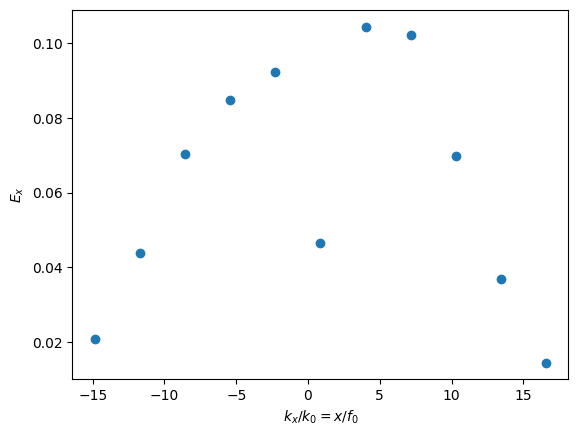

In [65]:
plt.scatter(kx_normalized, np.abs(ReflectedHarmonicsCmplxAmp_X))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$E_x$")

In [2]:
plt.scatter(kx_normalized, np.abs(ReflectedHarmonicsCmplxAmp_Y))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$E_y$")

NameError: name 'kx_normalized' is not defined

In [ ]:
KX, KY = plt.meshgrid(kx_normalized, ky_normalized)

Text(0, 0.5, '$E_y$')

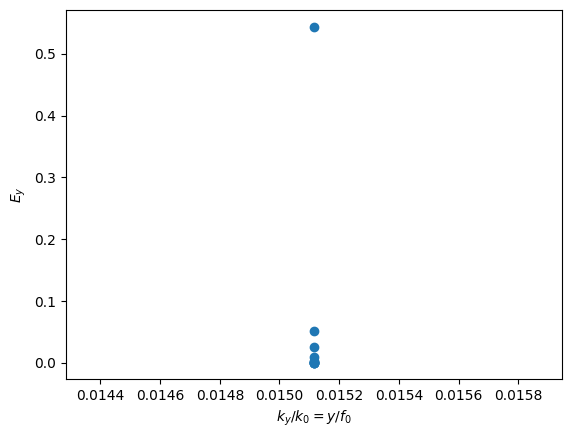

In [69]:
plt.scatter(ky_normalized, np.abs(ReflectedHarmonicsCmplxAmp_Y))
plt.xlabel(r"$k_y/k_0 = y/f_0$")
plt.ylabel(r"$E_y$")

In [1]:
solver_1d.fields(component='Ex', layer=layer_stack.incident_layer)

NameError: name 'solver_1d' is not defined

In [ ]:
rz = - np.linalg.inv(KzReflectionRegion) @ (Kx @ rx + Ky @ ry)